# Bank Term Deposit marketing campaign analysis

The data that we are going to use for this is a subset of an open source Bank Marketing Data Set from the UCI ML repository: https://archive.ics.uci.edu/ml/citation_policy.html.

In [20]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [32]:
#importing dataset
df=pd.read_csv("bank additional full.csv",sep=';')
pd.set_option('display.max_columns',None)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [12]:
#looking at shape of data (rows,columns)
df.shape

(41188, 21)

In [33]:
#analysing the columns
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Input features (column names):

age - client's age in years (numeric)
job - type of job (categorical: admin., blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown)
marital - marital status (categorical: divorced, married, single, unknown)
education - client's education (categorical: basic.4y, basic.6y, basic.9y, high.school, illiterate, professional.course, university.degree, unknown)
default - has credit in default? (categorical: no, yes, unknown)
housing - has housing loan? (categorical: no, yes, unknown)
loan - has personal loan? (categorical: no, yes, unknown)
contact - contact communication type (categorical: cellular, telephone)
month - last contact month of the year (categorical: jan, feb, mar, ..., nov, dec)
day_of_week - last contact day of the week (categorical: mon, tue, wed, thu, fri)
duration - last contact duration, in seconds (numeric).
campaign - number of contacts performed and for this client during this campaign (numeric, includes the last contact)
pdays - number of days that have passed after the client was last contacted from the previous campaign (numeric; 999 means the client has not been previously contacted)
previous - number of contacts performed for this client before this campaign (numeric)
poutcome - outcome of the previous marketing campaign (categorical: failure, nonexistent, success)
emp.var.rate - employment variation rate, quarterly indicator (numeric)
cons.price.idx - consumer price index, monthly indicator (numeric)
cons.conf.idx - consumer confidence index, monthly indicator (numeric)
euribor3m - euribor 3 month rate, daily indicator (numeric)
nr.employed - number of employees, quarterly indicator (numeric)

Output feature (desired target):

y - has the client subscribed a term deposit? (binary: yes,no)

In [14]:
#getting general information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [15]:
#getting statistical characteristics of dataset
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
#include objects
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


The result shows that the average client is a MARRIED ADMINISTRATIVE STAFF of AGE-40 who holds a UNIVERSITY DEGREE.
Maximum number of calls are made by cellular and in Thursdays and in month May.

In [23]:
#term deposit holders
df['y'].value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

4640 clients (11.3%) of 41188 issued a term deposit.

In [21]:
#marital distribution
df['marital'].value_counts(normalize=True)

married     0.605225
single      0.280859
divorced    0.111974
unknown     0.001942
Name: marital, dtype: float64

As we can see, 61% (0.61) of clients are married, which must be taken into account when planning marketing campaigns.

In [9]:
#analysing marketting calls
df.sort_values(by="duration",ascending=False).head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
24091,33,technician,single,professional.course,no,yes,no,telephone,nov,mon,4918,1,999,0,nonexistent,-0.1,93.200,-42.0,4.406,5195.8,no
22192,52,blue-collar,married,basic.4y,no,no,no,telephone,aug,thu,4199,3,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,yes
40537,27,admin.,single,high.school,no,no,no,telephone,aug,fri,3785,1,999,0,nonexistent,-1.7,94.027,-38.3,0.888,4991.6,no
13820,31,technician,married,professional.course,no,no,no,cellular,jul,thu,3643,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,yes
7727,37,unemployed,married,professional.course,no,yes,no,telephone,may,fri,3631,2,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,yes


The longest calls exceed 1 hour or 3600 seconds and was usually on Thursdays,Fridays and Mondays.

In [14]:
df.sort_values(by=['age',"duration"],ascending=True).head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
37558,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,92,3,4,2,success,-2.9,92.201,-31.4,0.869,5076.2,no
37539,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,182,2,999,2,failure,-2.9,92.201,-31.4,0.869,5076.2,no
37140,17,student,single,unknown,no,yes,no,cellular,aug,wed,432,3,4,2,success,-2.9,92.201,-31.4,0.884,5076.2,no
37579,17,student,single,basic.9y,no,unknown,unknown,cellular,aug,fri,498,2,999,1,failure,-2.9,92.201,-31.4,0.869,5076.2,yes
38274,17,student,single,unknown,no,no,yes,cellular,oct,tue,896,1,2,2,success,-3.4,92.431,-26.9,0.742,5017.5,yes


The youngest customers are at the age of 17, and the call duration exceeded 3 minutes only for three clients, which indicates the ineffectiveness of long-term interaction with such clients.

In [5]:
#replacing y value to binary
d={"no":0,"yes":1}
df["y"]=df["y"].map(d)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [22]:
#Clients subscribed to term deposit
print("Percentage of clients subscribed =",df["y"].mean()*100,"%")

Percentage of clients subscribed = 11.265417111780131 %


11.3% is a rather bad indicator for a bank, with such a percentage of attracted customers a business can collapse

In [19]:
#average subscribed client
df[df["y"] == 1].mean()

C:\Users\Happy\AppData\Local\Temp\ipykernel_23808\1009781068.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df["y"] == 1].mean()


age                 40.913147
duration           553.191164
campaign             2.051724
pdays              792.035560
previous             0.492672
emp.var.rate        -1.233448
cons.price.idx      93.354386
cons.conf.idx      -39.789784
euribor3m            2.123135
nr.employed       5095.115991
y                    1.000000
dtype: float64

Thus, the average age of the attracted clients is about 41 and 2 calls were required to attract them.

In [28]:
sec=df[df["y"] == 1]["duration"].mean()
mi=sec//60
print("Average Duration of successful calls = ",mi,"mins",int(sec)%60,"sec")

Average Duration of successful calls =  9.0 mins 13 sec


So, the average duration of a successful call is almost 553 seconds, that is, nearly 10 minutes

In [8]:
#relation between marital status and subscription
pd.crosstab(df['y'],df['marital'])

marital,divorced,married,single,unknown
y,,,,
0,4136,22396,9948,68
1,476,2532,1620,12


In [9]:
pd.crosstab(df['y'],df['marital'],normalize='index')

marital,divorced,married,single,unknown
y,,,,
0,0.113166,0.612783,0.272190,0.001861
1,0.102586,0.545690,0.349138,0.002586


We see that more than half (61%) of the clients who haven't subscribed are MARRIED whereas most of the subscribed clients are also married so there are many potential cutomers.

In [18]:
#customer profiling
df.pivot_table(
    ["age", "duration"],
    ["job"],
    aggfunc = "mean"
)

,age,duration
job,,
admin.,38.187296,254.312128
blue-collar,39.555760,264.542360
entrepreneur,41.723214,263.267857
housemaid,45.500000,250.454717
management,42.362859,257.058140
retired,62.027326,273.712209
self-employed,39.949331,264.142153
services,37.926430,258.398085
student,25.894857,283.683429


The obtained results allow to plan marketing banking campaigns more effectively. 

### Visualization

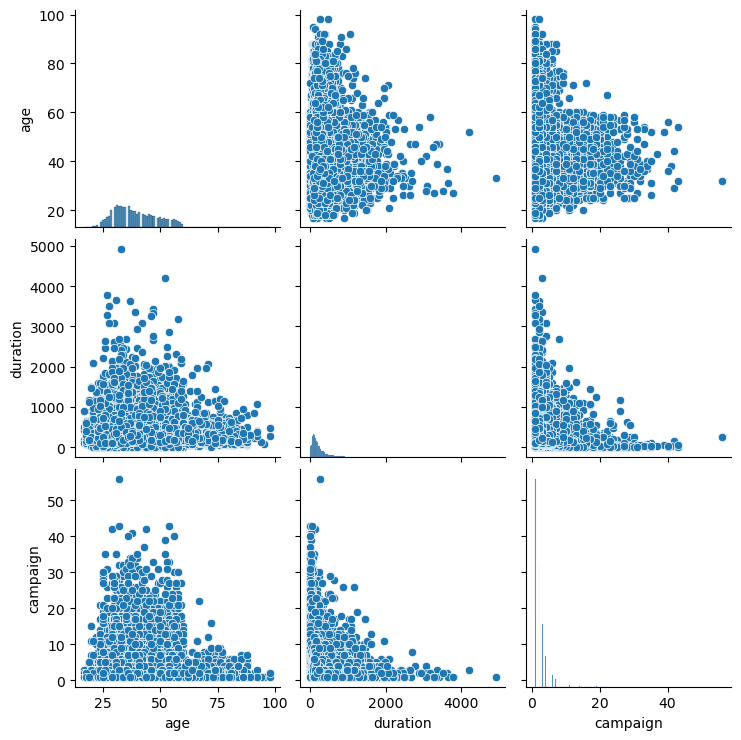

<Figure size 1500x1500 with 0 Axes>

In [26]:
#pairwise dependencies between the features
sns.pairplot(df[['age','duration','campaign']]);
plt.figure(figsize=(15,15));

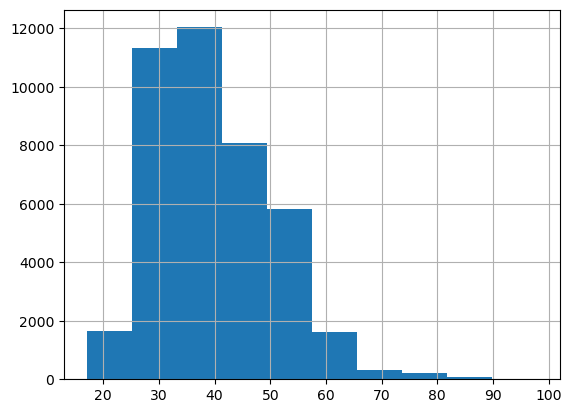

In [28]:
#age distribution
df['age'].hist();

The histogram shows that most of our clients are between the ages of 25 and 50, which corresponds to the actively working part of the population.

Boxplot allows you to compactly visualize the main characteristics of the feature distribution (the median, lower and upper quartile, minimal and maximum, outliers).

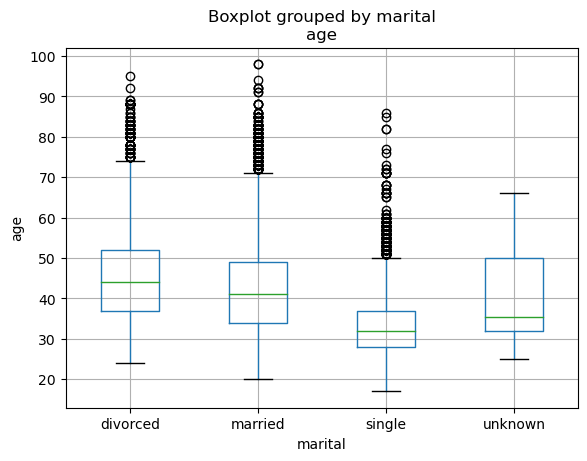

In [34]:
#marital distribution 
df.boxplot(column='age',by='marital');
plt.ylabel("age");

The plot shows that unmarried people are on average younger than divorced and married ones.

## Key Findings

    1.Only 4640 clients (11.3%) have subscribed term deposit.
    2.The campaign is ineffective against young clients (Age <20).
    3.The average age of the attracted clients is about 41 and 2 calls 
    were required to attract them.
    4.The average duration of a successful call is almost 553 seconds, 
    that is, nearly 10 minutes.
    5.More than half (61%) of the clients who haven't subscribed are 
    MARRIED, who are potential customers.


